In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from statistics import mode
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/train(1).csv")

test = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/test(1).csv")
pd.pandas.set_option("display.max_columns",None)

In [3]:
df.describe() 

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8202.50000,22.951900,0.504058,1.696920,5.597640,1.673380,1.024020,0.845700,396.744560,343.496490,11.237600,8.910200,8.118400,1.674060,14.598400,40.098340,-20.593900,125.572130,14.008500,2.334800,12.907179,2.985135,3.080190,0.360069
std,2886.89568,10.547951,0.228211,0.764911,2.597797,0.751486,0.575427,0.536015,71.814197,35.520142,4.032192,3.935745,3.690575,0.742449,9.240523,2.297867,20.480989,27.624359,7.790539,1.333899,4.159773,4.712540,4.210632,0.494650
min,3203.00000,5.100000,0.101212,0.400000,0.600000,0.400000,0.000000,0.200000,283.200000,283.500000,5.000000,3.000000,3.000000,0.400000,0.000000,37.900000,-42.000000,96.700000,1.000000,1.000000,5.150000,-9.050000,-2.800000,0.016098
25%,5702.75000,13.700000,0.298696,1.000000,3.400000,1.000000,0.600000,0.400000,336.300000,312.700000,8.000000,5.000000,5.000000,1.000000,6.000000,37.900000,-42.000000,96.700000,7.000000,1.000000,9.300000,-0.200000,-0.600000,0.102143
50%,8202.50000,22.600000,0.507989,1.600000,5.600000,1.600000,1.000000,0.800000,386.500000,342.400000,11.000000,9.000000,8.000000,1.600000,15.000000,37.900000,-1.000000,152.000000,14.000000,2.000000,12.700000,2.800000,2.300000,0.206182
75%,10702.25000,32.100000,0.703826,2.400000,7.800000,2.400000,1.600000,1.200000,441.200000,365.400000,15.000000,12.000000,11.000000,2.400000,22.000000,42.500000,-1.000000,152.000000,21.000000,3.000000,16.250000,6.400000,5.300000,0.411745
max,13202.00000,42.000000,0.899184,3.000000,10.000000,3.000000,2.000000,2.600000,572.300000,423.300000,20.000000,18.000000,18.000000,3.000000,30.000000,42.500000,-1.000000,152.000000,27.000000,5.000000,23.750000,19.550000,16.700000,9.170477


#### Mean and std are far from each other.

<Axes: xlabel='Target Pressure (bar)', ylabel='Count'>

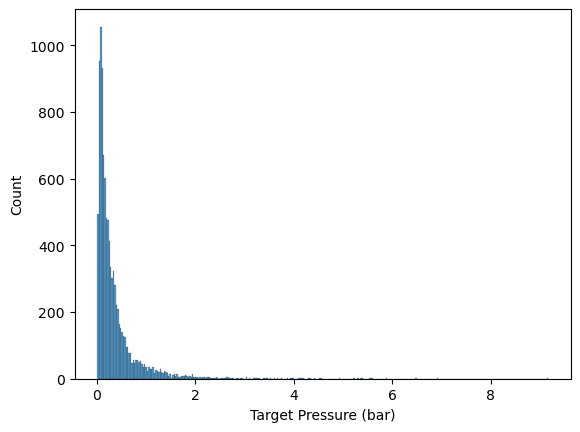

In [4]:
sns.histplot(df['Target Pressure (bar)'])

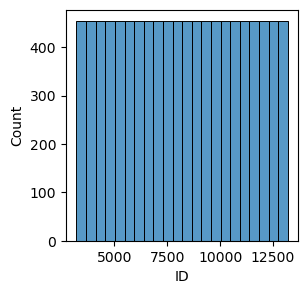

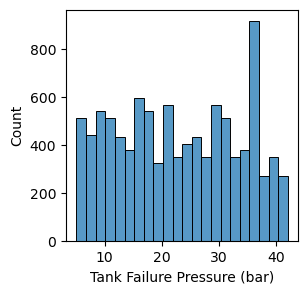

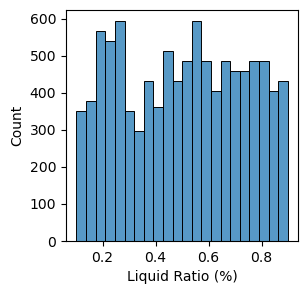

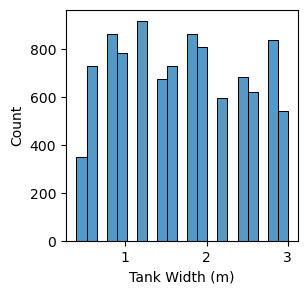

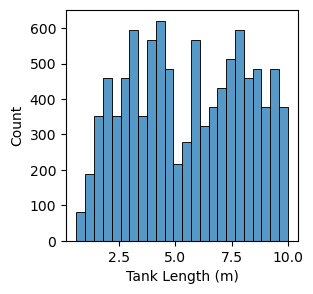

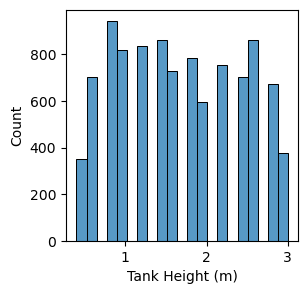

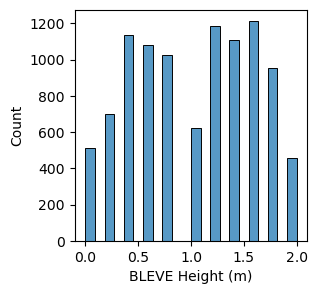

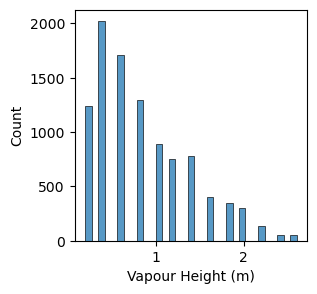

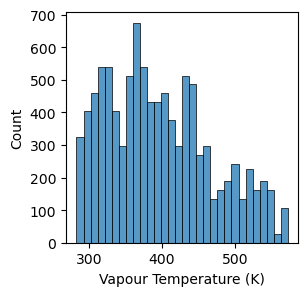

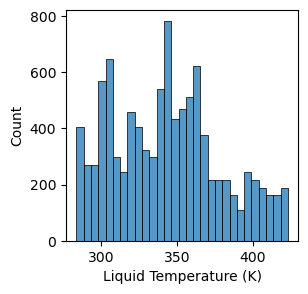

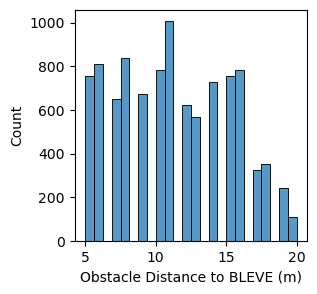

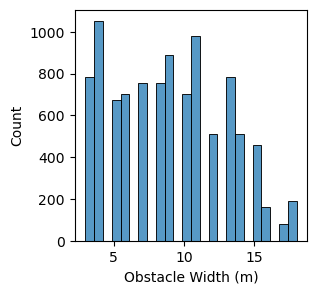

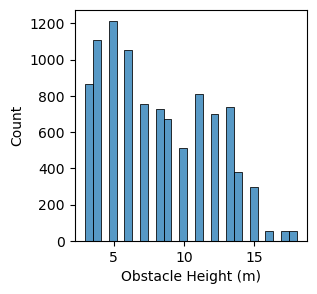

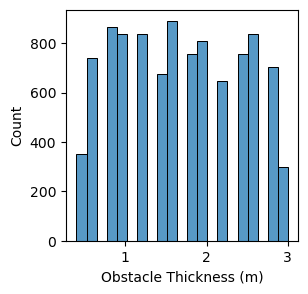

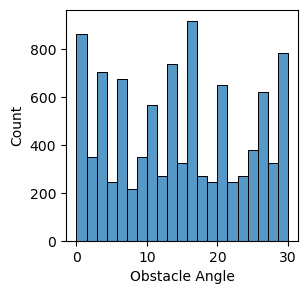

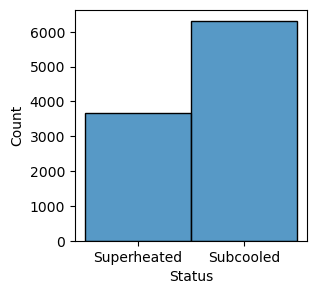

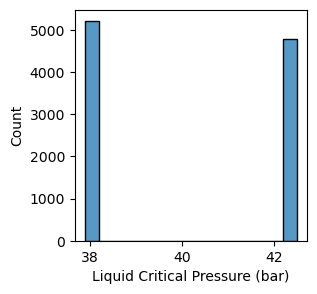

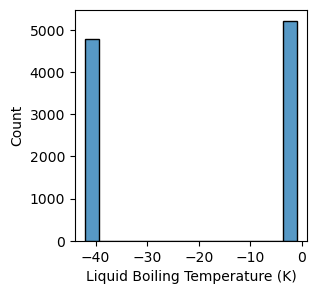

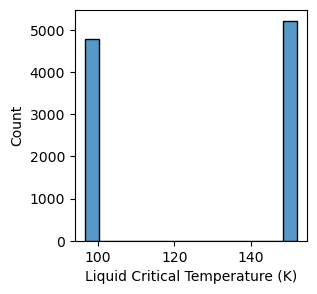

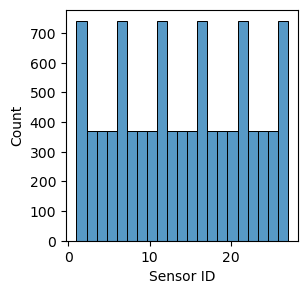

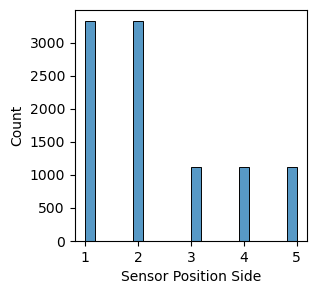

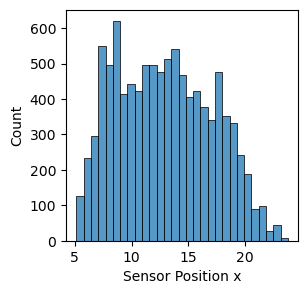

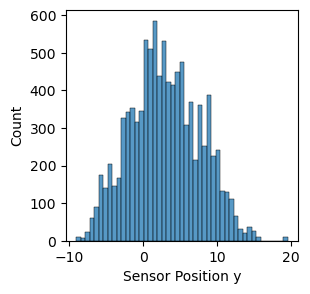

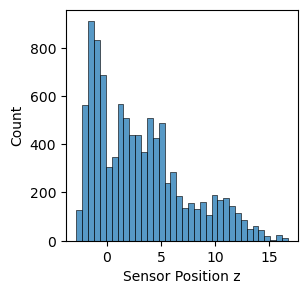

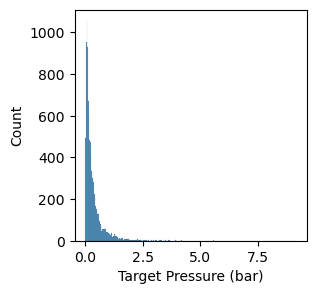

In [5]:
for col in df.columns:
        fig ,ax  = plt.subplots(figsize = (3,3))
        sns.histplot(df[col],ax=ax)
        plt.show()

#### Some plots are skewd

In [6]:
df.info()  #checking variable types and null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   Tank Failure Pressure (bar)      10000 non-null  float64
 2   Liquid Ratio (%)                 10000 non-null  float64
 3   Tank Width (m)                   10000 non-null  float64
 4   Tank Length (m)                  10000 non-null  float64
 5   Tank Height (m)                  10000 non-null  float64
 6   BLEVE Height (m)                 10000 non-null  float64
 7   Vapour Height (m)                10000 non-null  float64
 8   Vapour Temperature (K)           10000 non-null  float64
 9   Liquid Temperature (K)           10000 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10000 non-null  int64  
 11  Obstacle Width (m)               10000 non-null  int64  
 12  Obstacle Height (m)

In [7]:
# Have only one object type
df["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [8]:
df["Status"].replace(["Superheated",'Subcooled'], [0,1],inplace=True)  # encoded superheated = 0 and subcooled = 1

In [9]:
# Creating new column
df["Tank_Volume"] = df["Tank Length (m)"] * df['Tank Height (m)'] * df['Tank Width (m)']

In [10]:
df.drop(columns='ID',axis='y',inplace=True)
# Putting Target Pressure (bar) at last 
r = df['Target Pressure (bar)']
df.drop('Target Pressure (bar)',axis=1,inplace=True)
df['Target Pressure (bar)'] = r

<Axes: >

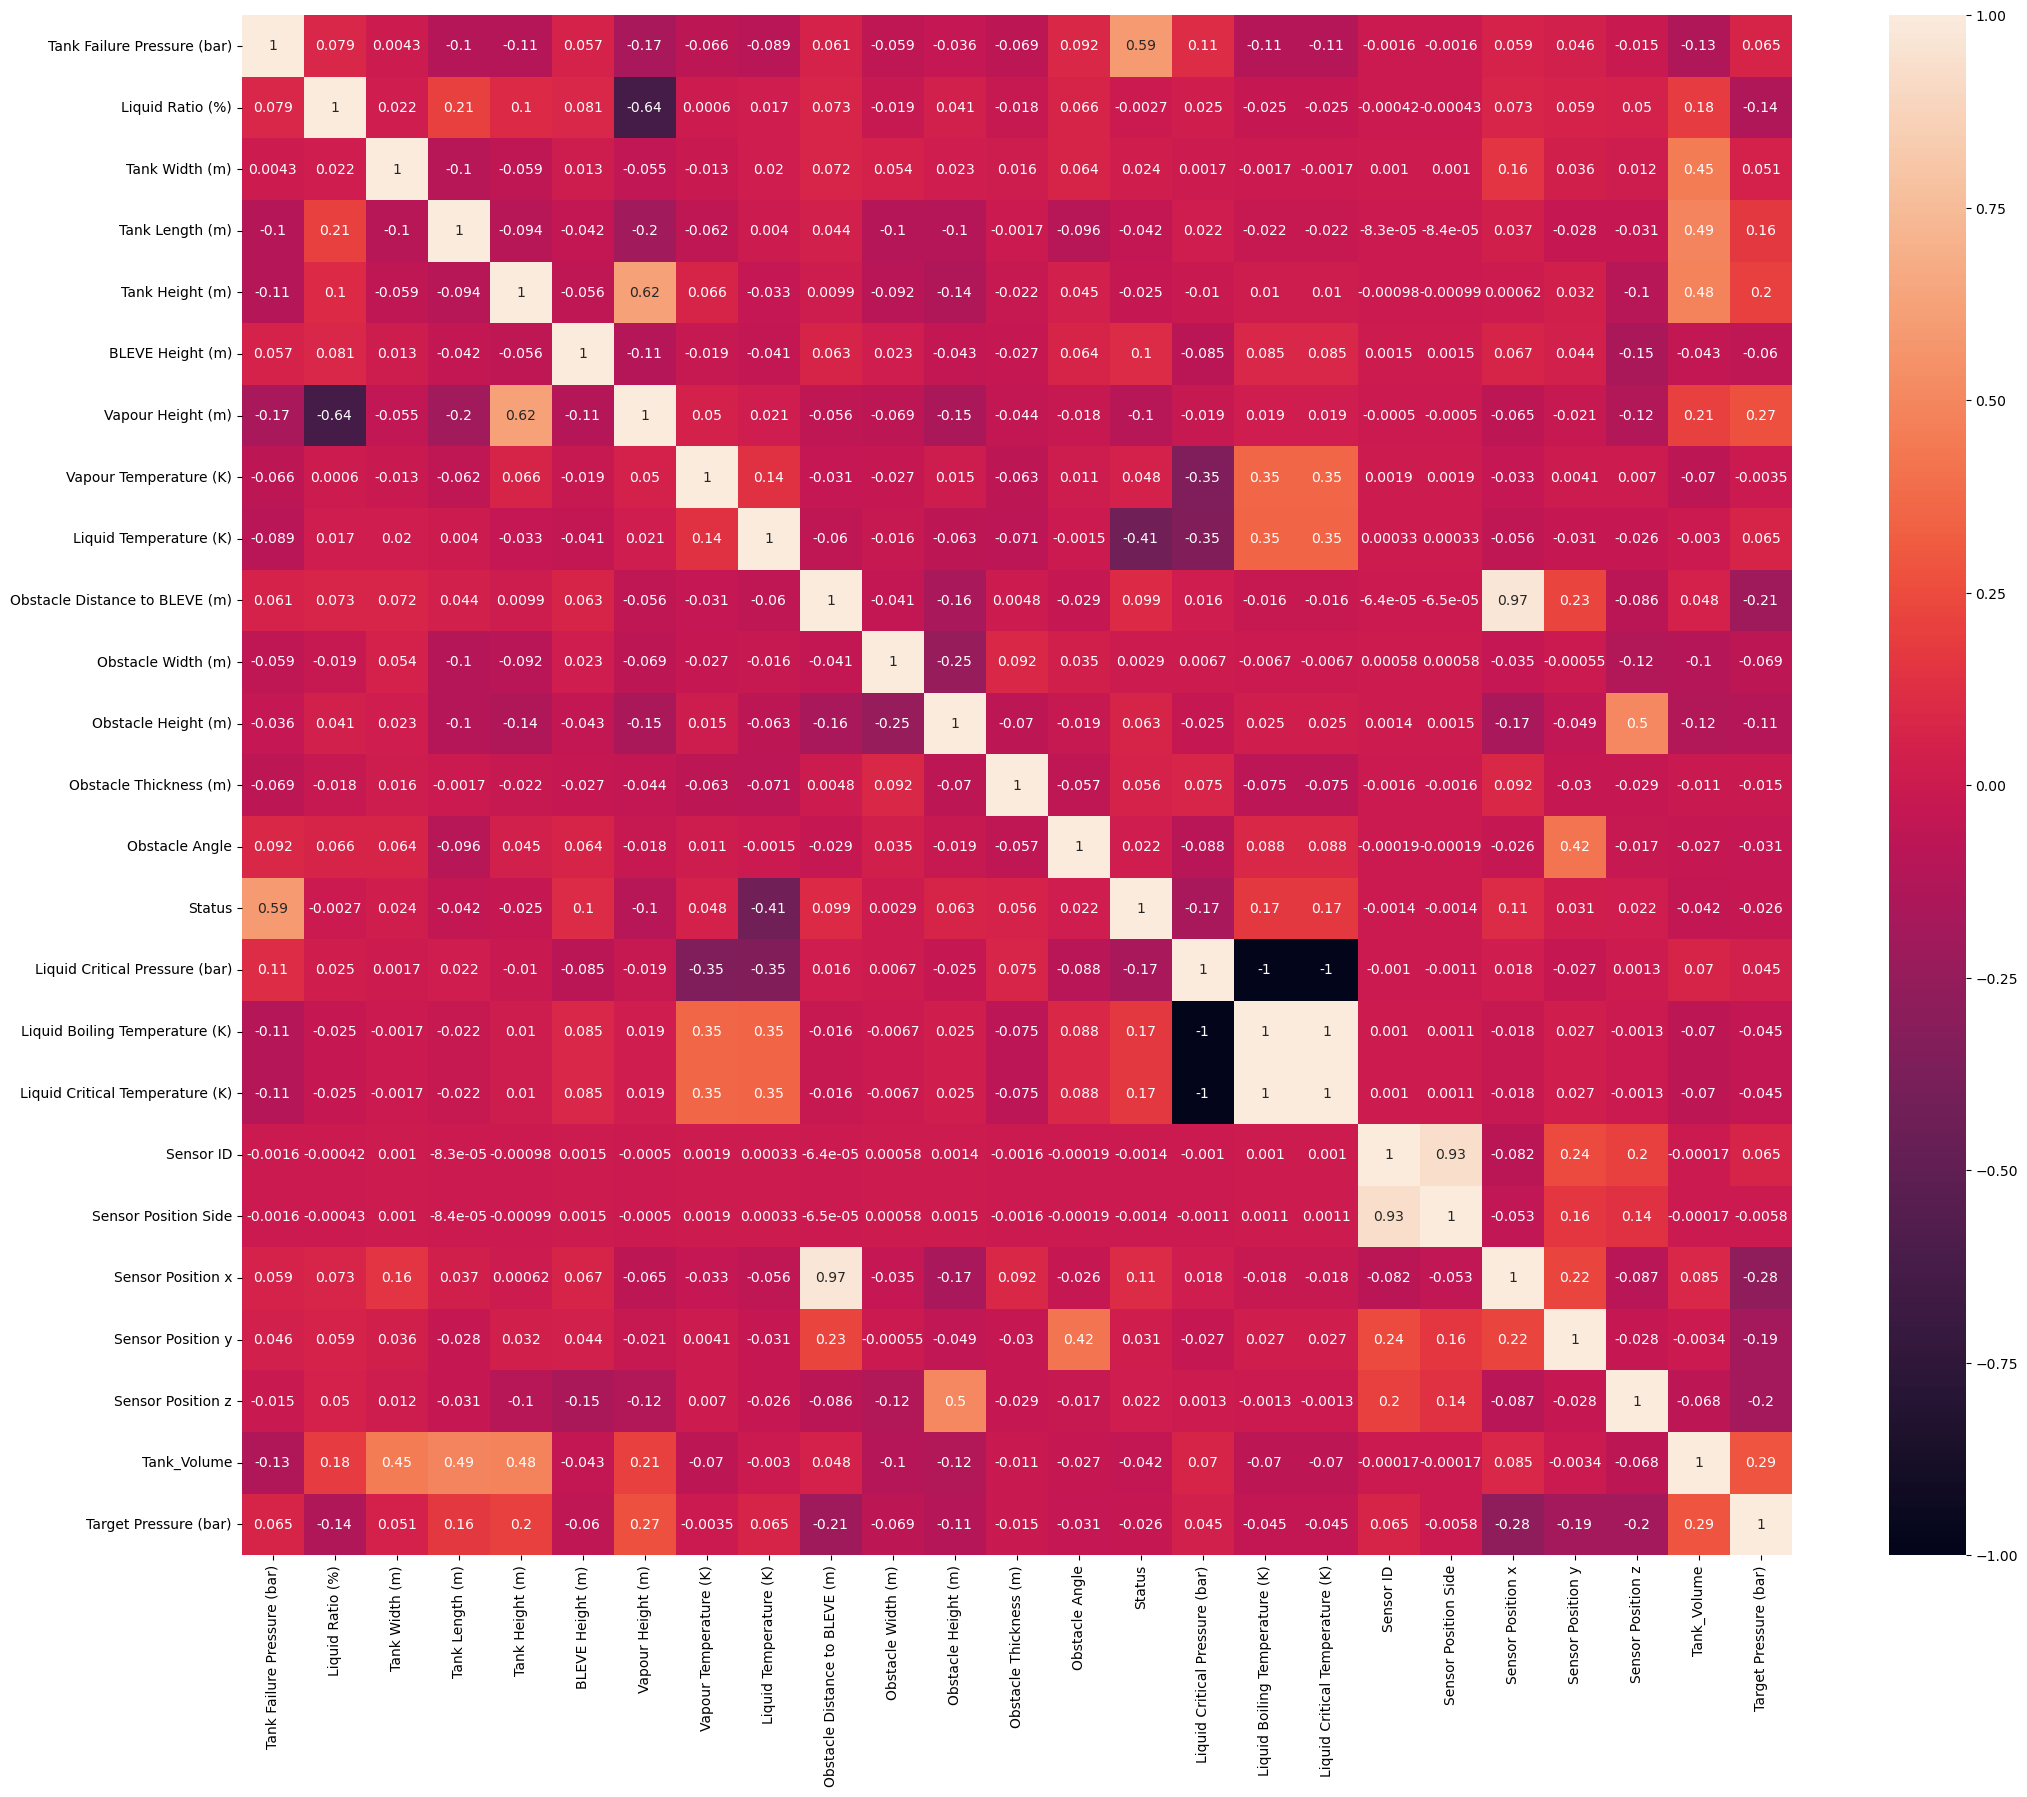

In [11]:
# Checking correlations
fig ,ax  = plt.subplots(figsize = (25,20))
sns.heatmap(df.corr() ,annot=True,ax=ax)

### Columns to be removed:
- Tank Width (m)	Tank Length (m)	Tank Height (m)    #Volume is taken no need of them anymore.
- Liquid Ratio (%)                                     # high corelation with vapour height
- Obstacle Distance to BLEVE (m)                       # Distance x is already given
- Liquid Critical Pressure (bar)                       # not needed and high corr
- Liquid Boiling Temperature (K)                       # not needed and high corr 
- Liquid Critical Temperature (K)                      # not needed and high corr

##### Ignore status as it is a categorical col

In [12]:
df.drop(columns=['Tank Width (m)','Tank Length (m)','Tank Height (m)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)','Liquid Critical Pressure (bar)','Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)'],axis='y',inplace=True)

<Axes: >

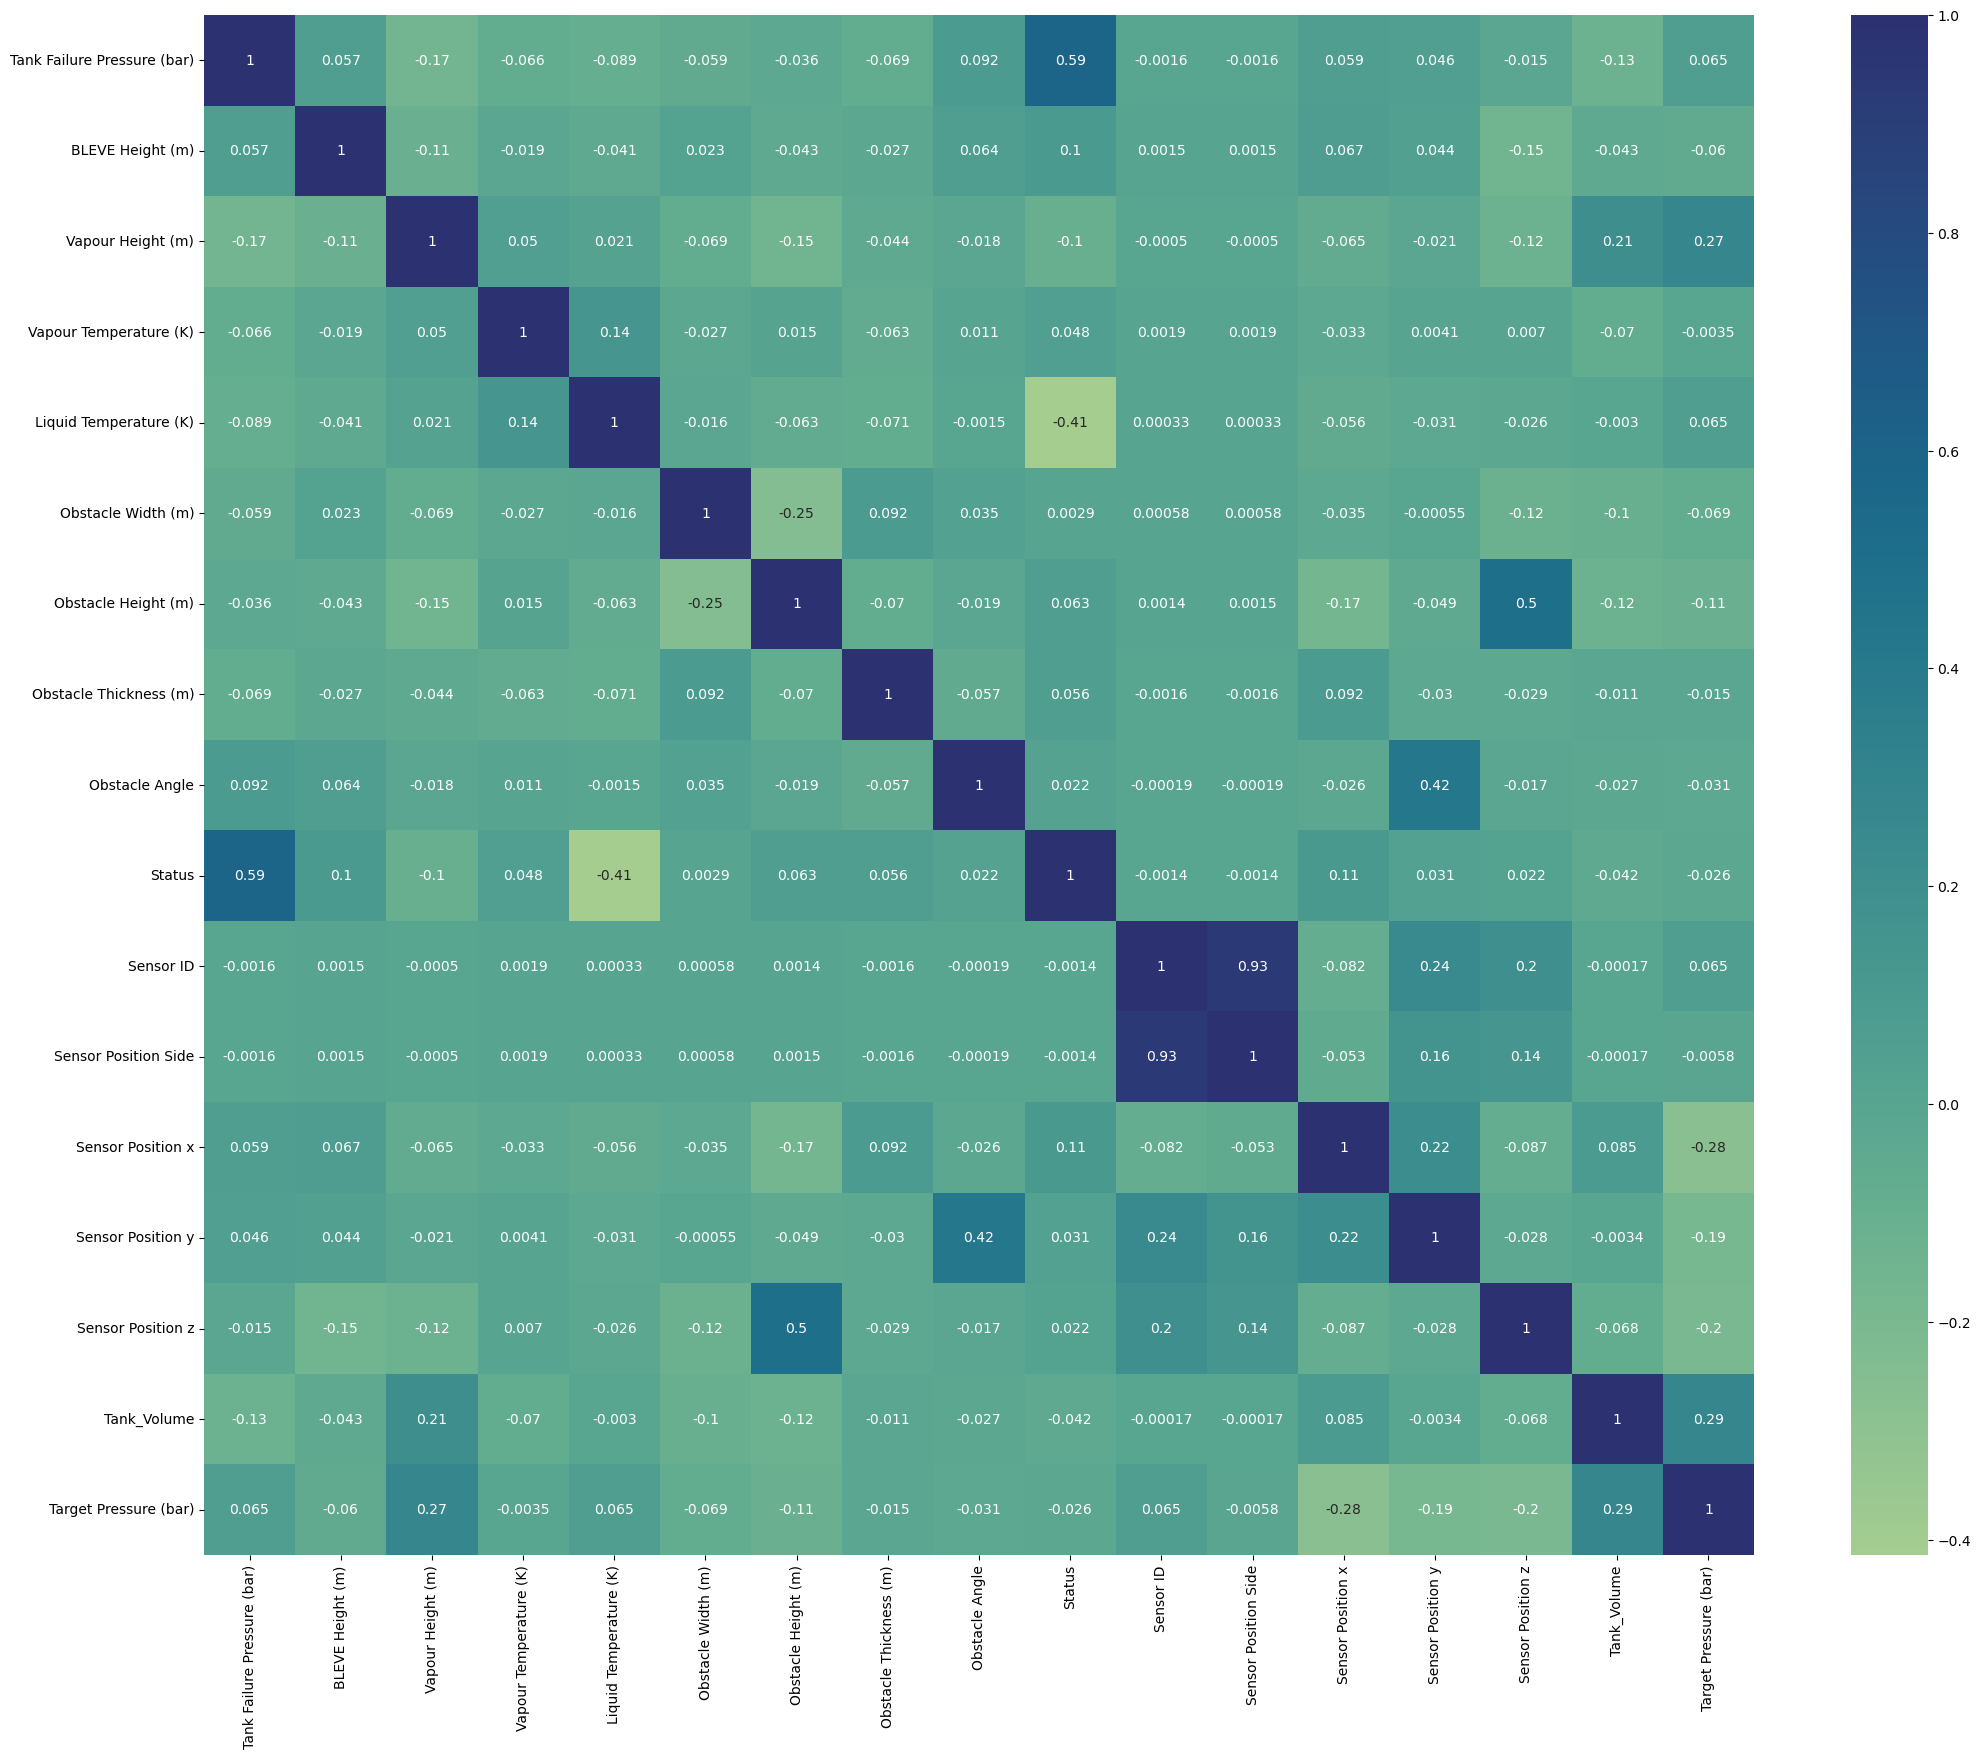

In [13]:
# Checking correlations again
fig ,ax  = plt.subplots(figsize = (25,20))
sns.heatmap(df.corr() ,annot=True,ax=ax,cmap='crest')

<Axes: >

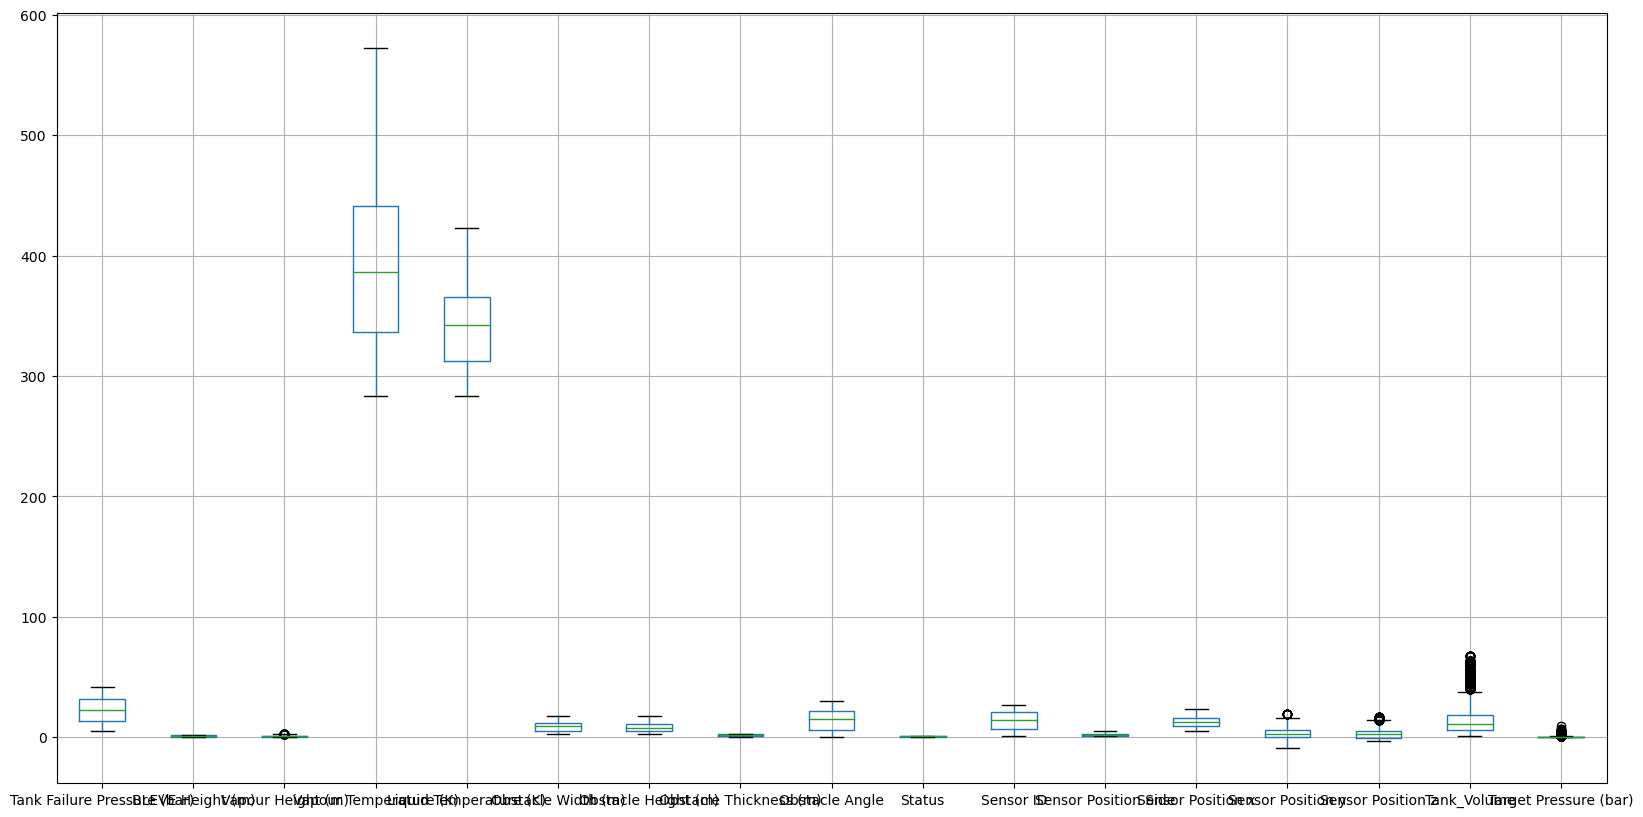

In [14]:
### Checking Outliers
df.boxplot(figsize=(20,10))

In [15]:
Outlier =[]

def outliers_IQR_test(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    outliers=[]
    for i in df:
        if i<=lower or i>=upper:
            outliers.append(i)
    return outliers

for i in df.columns:
    outliers_list = outliers_IQR_test(df[i])
    print(i,' - -'*5,'>',len(outliers_list))

Tank Failure Pressure (bar)  - - - - - - - - - - > 0
BLEVE Height (m)  - - - - - - - - - - > 0
Vapour Height (m)  - - - - - - - - - - > 108
Vapour Temperature (K)  - - - - - - - - - - > 0
Liquid Temperature (K)  - - - - - - - - - - > 0
Obstacle Width (m)  - - - - - - - - - - > 0
Obstacle Height (m)  - - - - - - - - - - > 0
Obstacle Thickness (m)  - - - - - - - - - - > 0
Obstacle Angle  - - - - - - - - - - > 0
Status  - - - - - - - - - - > 0
Sensor ID  - - - - - - - - - - > 0
Sensor Position Side  - - - - - - - - - - > 0
Sensor Position x  - - - - - - - - - - > 0
Sensor Position y  - - - - - - - - - - > 10
Sensor Position z  - - - - - - - - - - > 91
Tank_Volume  - - - - - - - - - - > 675
Target Pressure (bar)  - - - - - - - - - - > 882


### Because we got too many outliers we will use TREE based model.

In [16]:
# Modelling libs

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [17]:
x = df.drop(columns="Target Pressure (bar)")
y = df[["Target Pressure (bar)"]]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30)

In [19]:
rf = RandomForestRegressor(random_state=30)
dt = DecisionTreeRegressor(random_state=30)

rf.fit(x_train, y_train)
dt.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


DecisionTreeRegressor(random_state=30)

In [20]:
from sklearn.metrics import mean_absolute_percentage_error
#predicting the values of test train data
test_pred=rf.predict(x_test)
train_pred=rf.predict(x_train)

print('Random_forest')
print('train MAPE: ',mean_absolute_percentage_error(y_train, train_pred))
print('train r2 score: ',r2_score(y_train,train_pred))
print('--------------')
print('test MAPE: ',mean_absolute_percentage_error(y_test, test_pred))
print('test r2 score: ',r2_score(y_test,test_pred))

test_pred=dt.predict(x_test)
train_pred=dt.predict(x_train)

print('\n','='*30,'\ndecision_tree')
print('train MAPE: ',mean_absolute_percentage_error(y_train, train_pred))
print('train r2 score: ',r2_score(y_train,train_pred))
print('--------------')
print('test MAPE: ',mean_absolute_percentage_error(y_test, test_pred))
print('test r2 score: ',r2_score(y_test,test_pred))


Random_forest
train MAPE:  0.06526644055931144
train r2 score:  0.9874855812171608
--------------
test MAPE:  0.18251268678158603
test r2 score:  0.8932496122920472

decision_tree
train MAPE:  0.0
train r2 score:  1.0
--------------
test MAPE:  0.2295429189468835
test r2 score:  0.8158088092066388


#### We are getting best results from Random Forest, will go for tuning now

In [21]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [50,100, 120, 150, 180, 200,220,250,300,400,500],
                 'max_features':['auto','sqrt'],
                 'max_depth':[3,5,10,12,15,20,30,50],
                 'min_samples_split' : [2, 5, 7,10, 15,20,25,50, 100],
                 'min_samples_leaf' : [1, 2, 5, 10,15,20,50]
                }
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=30,n_iter=80)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
132 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_param

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 12, 15, 20, 30,
                                                      50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20, 50],
                                        'min_samples_split': [2, 5, 7, 10, 15,
                                                              20, 25, 50, 100],
                                        'n_estimators': [50, 100, 120, 150, 180,
                                                         200, 220, 250, 300,
                                                         400, 500]},
                   random_state=30, verbose=2)

In [22]:
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [ ]:
rf_final=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth=20)

rf_final.fit(x_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
#predicting the values
pred=rf_final.predict(x_test)
print('MAPE: ',mean_absolute_percentage_error(y_test, pred))
r2_score(y_test,pred)

In [ ]:
#predicting the values
pred=rf_final.predict(x_train)
print('MAPE: ',mean_absolute_percentage_error(y_train, pred))
r2_score(y_train,pred)

In [ ]:
# Creating first submission file


x_test_first_sub = pd.read_csv('H:/boiling_liquid_expanding_vapour_explosion/test(1).csv')

x_test_first_sub.drop(columns='ID',axis='y',inplace=True)
x_test_first_sub["Status"].replace(["Superheated",'Subcooled'], [0,1],inplace=True)

x_test_first_sub["Tank_Volume"] = x_test_first_sub["Tank Length (m)"] * x_test_first_sub['Tank Height (m)'] * x_test_first_sub['Tank Width (m)']
x_test_first_sub.drop(columns=['Tank Width (m)','Tank Length (m)','Tank Height (m)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)','Liquid Critical Pressure (bar)','Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)'],axis='y',inplace=True)


x_test_first_sub

In [ ]:
test_pred=rf.predict(x_test_first_sub)
prediction = pd.DataFrame(test_pred,columns=['Target Pressure (bar)'])
prediction.to_csv('prediction.csv', index_label='ID')   # This file is performing better in leaderboard mape 36

In [ ]:
'''
test_pred=rf_final.predict(x_test_first_sub)
prediction = pd.DataFrame(test_pred,columns=['Target Pressure (bar)'])
prediction.to_csv('prediction1.csv', index_label='ID')'''